# Project Title: Amazon Sales Data Analysis Using Python (Pandas, Seaborn, and Matplotlib)
# Overview:
This project aims to analyze Amazon sales data to uncover meaningful insights related to sales performance, shipping efficiency, customer preferences, and order patterns. By leveraging Python libraries such as Pandas, Matplotlib, and Seaborn, we performed data cleaning, transformation, and visualization to address key business problems.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Hairav/Downloads/amazon_sales.csv - Sheet1.csv")

# Data Exploration and Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.shape

(128976, 19)

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [7]:
# Replace currency null value with INR
df["currency"].replace(np.nan,"INR",inplace=True)

In [8]:
# Replace amount null value with avg
df["Amount"].replace(np.nan,df["Amount"].mean(),inplace=True)


In [9]:
# Again checking null value in data set
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df.dropna(subset=["ship-city"], inplace=True)

In [11]:
df.drop(columns=["fulfilled-by"],axis=1,inplace=True)

In [12]:
df["Date"]=pd.to_datetime(df["Date"])

In [13]:
df["Amount"]=df["Amount"].astype("int")

In [18]:
df.drop("index",axis=1,inplace=True)

In [22]:
# Final Columns
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

# Key Questions

# 1. What is the total sales amount per category?

# Business Problem:
Identify top-performing product categories to focus marketing and inventory efforts.

In [31]:
category_sales = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
print(category_sales)

Category
T-shirt     41297552
Shirt       23338057
Blazzer     11730536
Trousers     5640170
Perfume       832171
Wallet        487552
Socks         163700
Shoes         130582
Watch            915
Name: Amount, dtype: int32


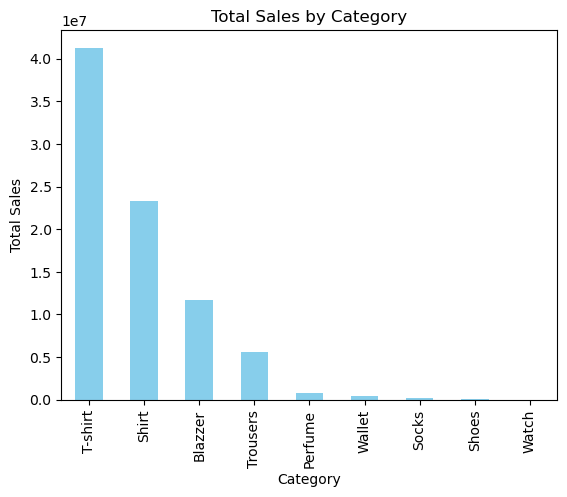

In [36]:
category_sales.plot(kind="bar",title="Total Sales by Category",color="skyblue")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# 2. What are the monthly sales trends over the year?
# Business Problem:
Understand seasonality and optimize inventory and marketing strategies during peak sales periods.

In [43]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

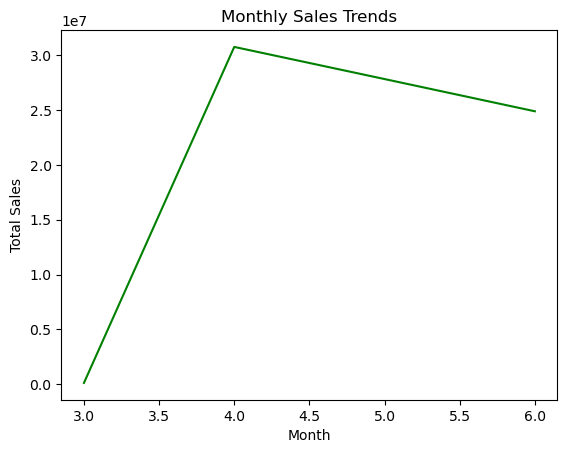

In [53]:
monthly_sales = df.groupby("Month")["Amount"].sum()
monthly_sales.plot(kind="line",title="Monthly Sales Trends",color="green")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# 3. Which states contribute the most to total sales?
# Business Problem:
Identify high-performing regions to allocate resources effectively.

In [59]:
state_sales=df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(10)
print(state_sales)

ship-state
MAHARASHTRA       14109780
KARNATAKA         11085655
TELANGANA          7364521
UTTAR PRADESH      7270826
TAMIL NADU         6956357
DELHI              4485342
KERALA             4104642
WEST BENGAL        3776667
ANDHRA PRADESH     3460738
HARYANA            3026741
Name: Amount, dtype: int32


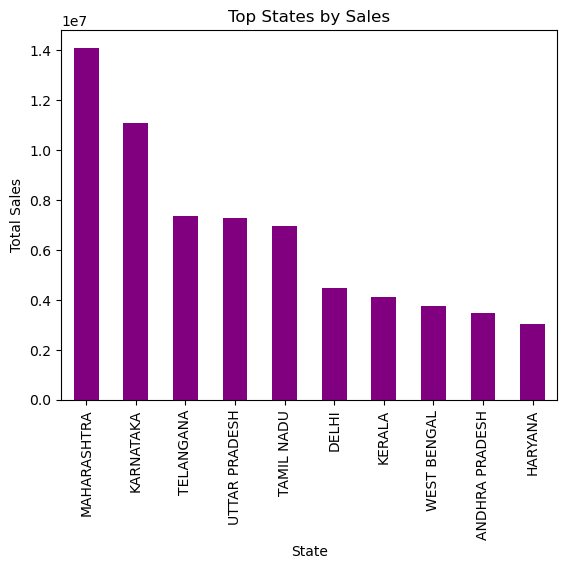

In [63]:
state_sales.plot(kind="bar",title="Top States by Sales",color="purple")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

# 4. What is the distribution of order quantities?
# Business Problem:
Understand customer purchasing behavior to tailor order processing systems.

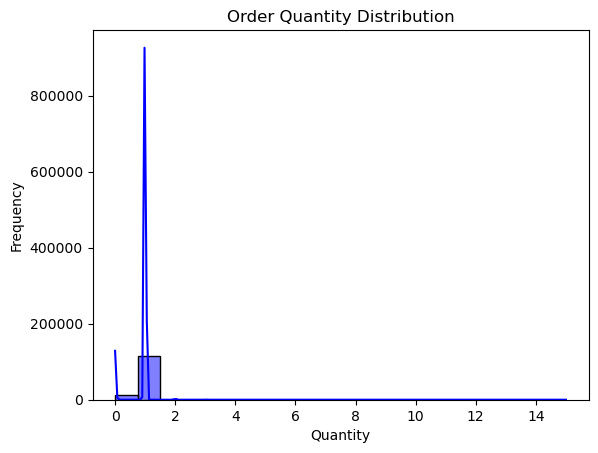

In [66]:
sns.histplot(df["Qty"],kde=True,bins=20,color="blue")
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# 5. How does sales performance vary across sales channels?
# Business Problem:
Compare the performance of different sales channels and decide on strategic investments.

In [69]:
channel_sales=df.groupby("Sales Channel")["Amount"].sum()
print(channel_sales)

Sales Channel
Amazon.in     83540883
Non-Amazon       80352
Name: Amount, dtype: int32


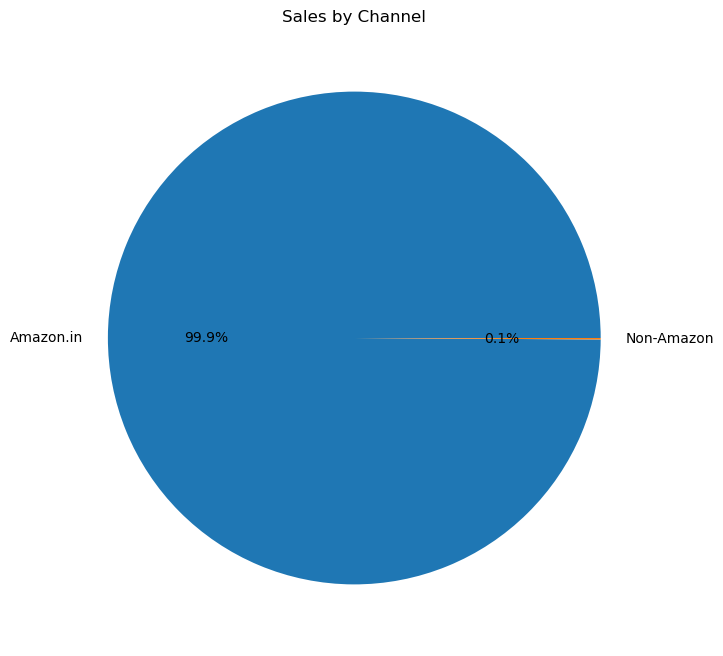

In [73]:
channel_sales.plot(kind="pie",autopct='%1.1f%%', title='Sales by Channel', figsize=(8,8))
plt.ylabel(" ")
plt.show()

# 6. What is the relationship between order size and sales amount?
# Business Problem:
Evaluate how product size affects sales to optimize packaging and logistics.

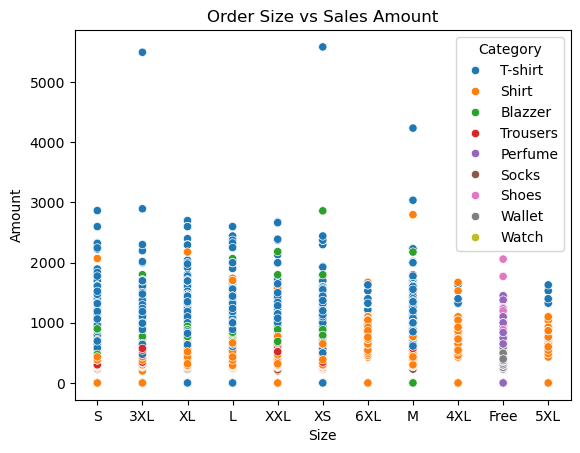

In [76]:
sns.scatterplot(data=df,x="Size",y="Amount",hue="Category")
plt.title('Order Size vs Sales Amount')
plt.xlabel('Size')
plt.ylabel('Amount')
plt.show()

# 7. What is the trend of B2B vs B2C sales?
# Business Problem:
Evaluate the growth and focus areas for B2B and B2C segments.

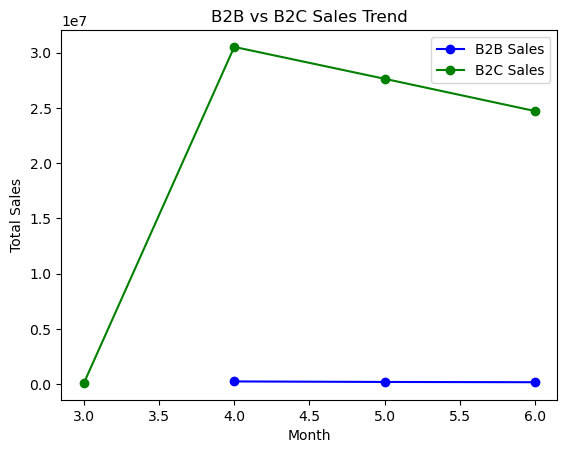

In [86]:
b2b_sales=df[df["B2B"]==True].groupby("Month")["Amount"].sum()
b2c_sales=df[df["B2B"]==False].groupby("Month")["Amount"].sum()
plt.plot(b2b_sales.index,b2b_sales.values,label="B2B Sales", marker="o", color="blue")
plt.plot(b2c_sales.index,b2c_sales.values,label="B2C Sales", marker="o", color="green")
plt.title('B2B vs B2C Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# 8. How does the sales amount vary by different shipping service levels (Note: Status Must be final Shipped)?
# Business Problem:
Understand which shipping service levels are generating the highest sales to optimize pricing, delivery strategies, and prioritize resources for popular options.

In [94]:
service_level_sales=df[df["Status"]=="Shipped"].groupby("ship-service-level")["Amount"].sum()
print(service_level_sales)

ship-service-level
Expedited    50345499
Standard       108544
Name: Amount, dtype: int32


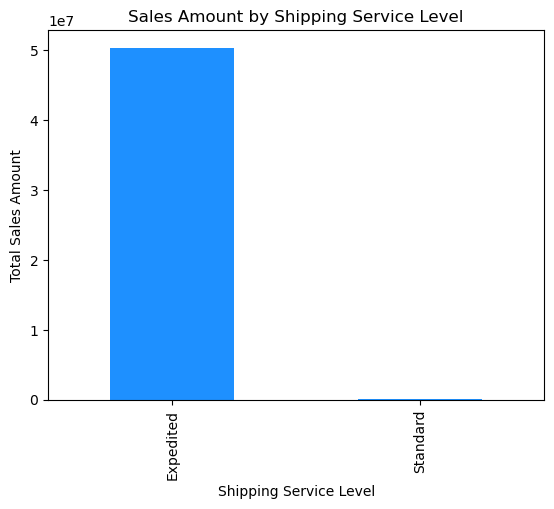

In [96]:
service_level_sales.plot(kind="bar",color="dodgerblue", title="Sales Amount by Shipping Service Level")
plt.xlabel("Shipping Service Level")
plt.ylabel("Total Sales Amount")
plt.show()

# 9. What is the average sales amount per shipping service level?
# Business Problem:
Evaluate the profitability of each shipping service level to assess whether certain options attract higher-value orders.

In [103]:
avg_service_level_sales = df.groupby('ship-service-level')['Amount'].mean().sort_values(ascending=False)
print(avg_service_level_sales)

ship-service-level
Expedited    655.689069
Standard     632.780552
Name: Amount, dtype: float64


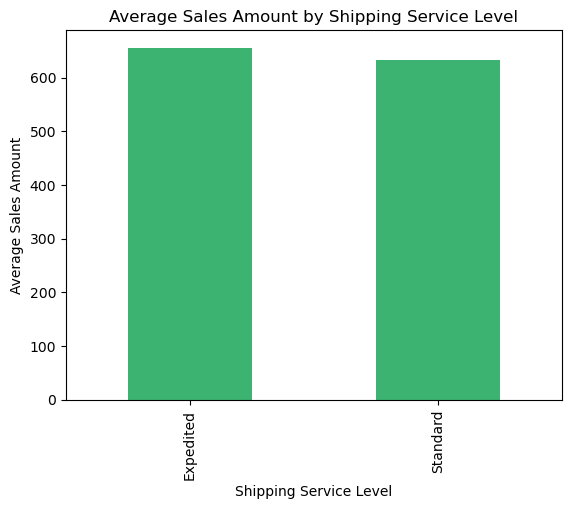

In [104]:
avg_service_level_sales.plot(kind='bar', color='mediumseagreen', title='Average Sales Amount by Shipping Service Level')
plt.xlabel('Shipping Service Level')
plt.ylabel('Average Sales Amount')
plt.show()

# 10. What is the relationship between shipping service levels and the number of orders?
# Business Problem:
Understand customer preferences for shipping service levels to improve service offerings and align logistics with demand.

In [108]:
service_level_orders = df['ship-service-level'].value_counts()
print(service_level_orders)

ship-service-level
Expedited    88608
Standard     40333
Name: count, dtype: int64


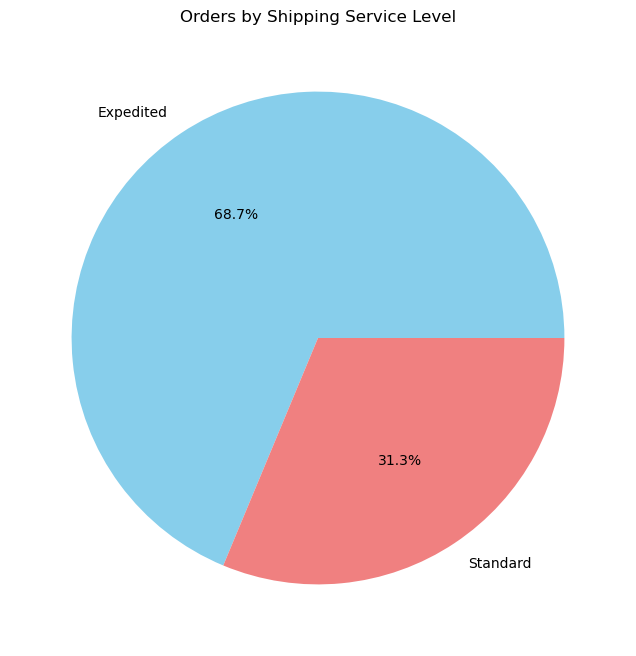

In [110]:
service_level_orders.plot(kind='pie',autopct='%1.1f%%', title='Orders by Shipping Service Level', figsize=(8, 8), colors=['skyblue', 'lightcoral', 'gold', 'lightgreen'])
plt.ylabel('')
plt.show()

# Analyzing Amazon sales data can provide valuable insights into sales performance, shipping efficiency, customer preferences, and market trends.
# Business Problems Solved:
Identified key sales drivers by category and region.
Improved understanding of customer preferences and behavior.
Highlighted operational inefficiencies in fulfillment and shipping.
Provided actionable insights for optimizing shipping service levels and sales channels.